In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor, plot_tree

# load drug effectiveness dataset
df_drug = pd.read_csv("drug.csv")

## Afficher le dataset

la distribution des données est un peu différente de celle des diapositives (valeurs cibles et dosage).

Cependant, le concept est le même

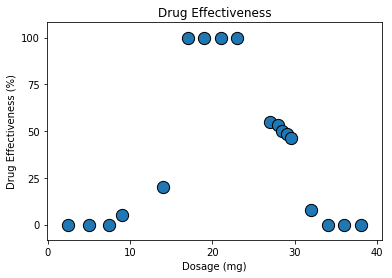

In [41]:
def plot_dataset(df):
    plt.xlabel('Dosage (mg)')
    plt.ylabel('Drug Effectiveness (%)')
    plt.xticks([0, 10, 20, 30, 40])
    plt.yticks([0, 25, 50, 75, 100])
    plt.title('Drug Effectiveness')
    plt.scatter(df['Dosage'], df['Effectiveness'], s=150, edgecolor='k')

def plot_regression_line(regressor):
    X_test = np.arange(0.0, 40.0, 0.01)[:, np.newaxis] # nécessaire pour afficher la ligne de régression
    y_pred = regressor.predict(X_test)
    plt.plot(X_test, y_pred, color="red",
             label="max_depth=2", linewidth=2)
    
plot_dataset(df)
plt.savefig('drug_data.jpg', dpi=300)

## Séparation entre Attributs et Cible

In [20]:
# reshape est nécessaire pour les observations avec une seule variable (avoir le shape d'une matrice 2D)
X = df['Dosage'].to_numpy().reshape(-1, 1) 
y = df['Effectiveness']

## Évaluation d'une Arbre de Régression avec profondeur 3

Vous pouvez changer la profondeur pour voir la différence.

In [53]:
dt_regressor = DecisionTreeRegressor(max_depth=3)
dt_regressor.fit(X, y)

DecisionTreeRegressor(max_depth=3)

### Plot dataset et ligne de regression

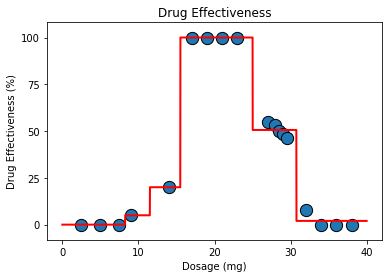

In [57]:
plot_dataset(df_drug)
plot_regression_line(dt_regressor)
plt.savefig('regression Line=3.jpg', dpi=300)

## Affiche l'arbre de régression

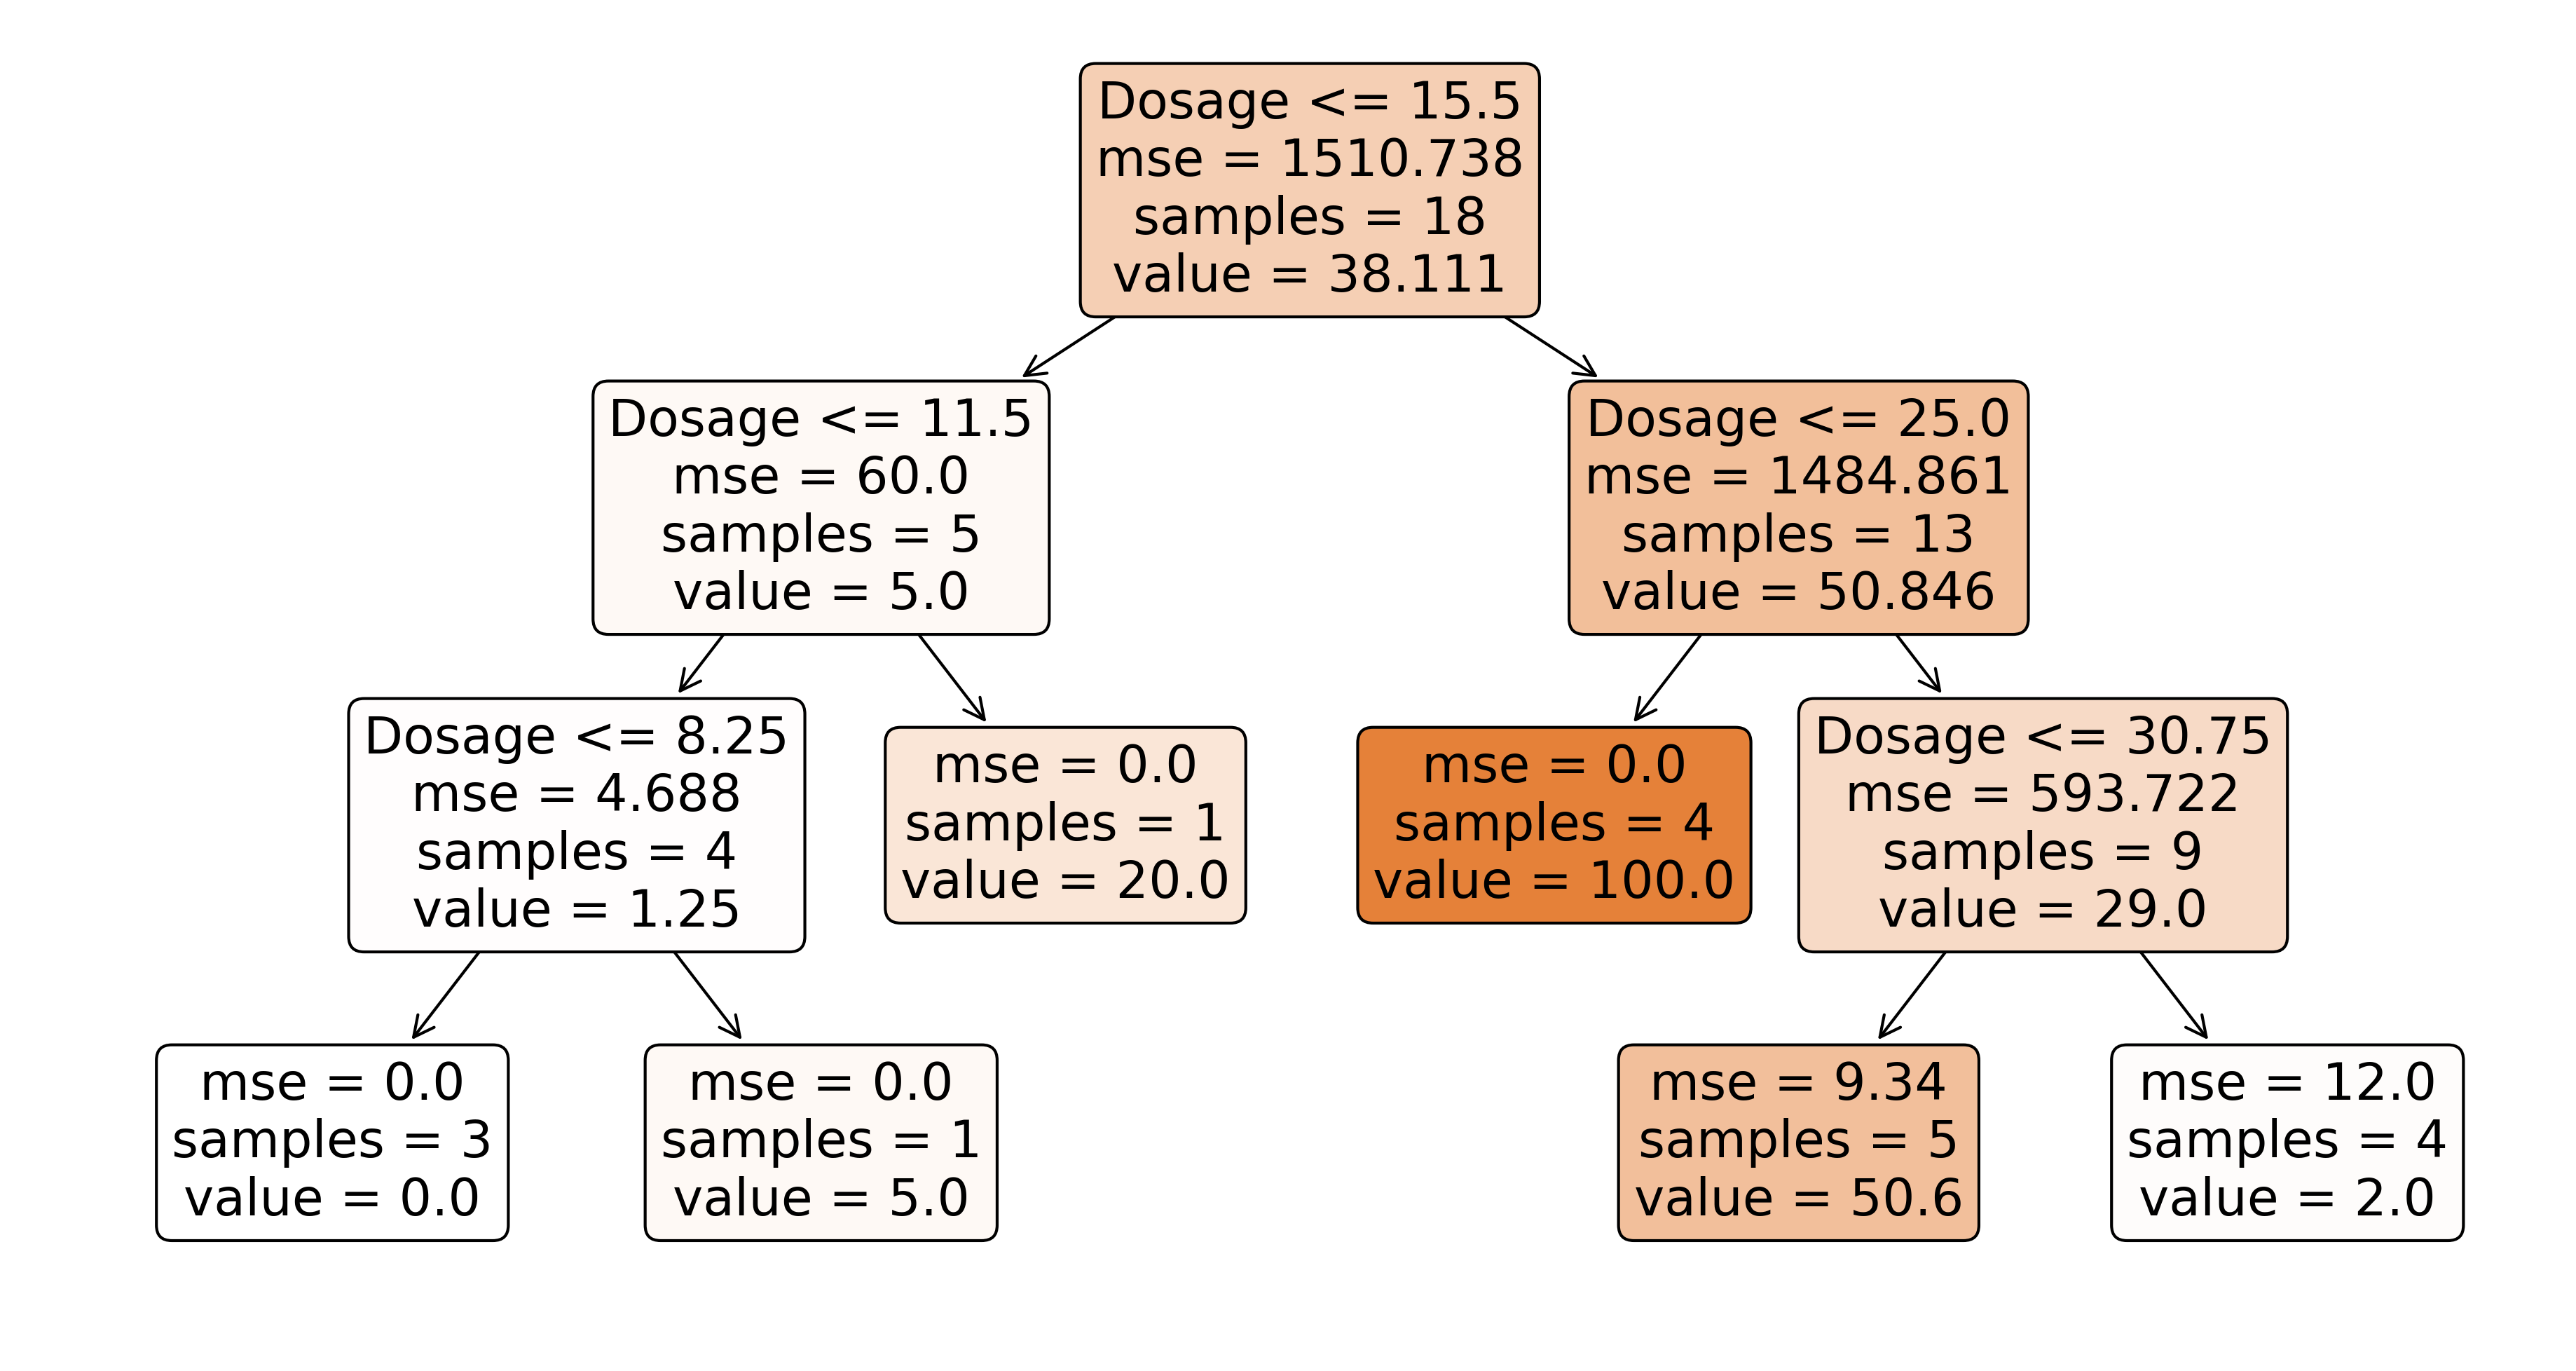

In [55]:
fig = plt.figure(figsize=(15,8), dpi= 300)
plot_tree(dt_regressor, 
          filled=True, 
          rounded=True, 
          feature_names=df.columns); 
plt.savefig('dtr_depth=3.jpg', dpi=300)